In [1]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
import torch
import logging
logging.basicConfig(level=logging.ERROR)
# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla K80


In [2]:
!pip install transformers==3.2.0

     |████████████████████████████████| 1.0 MB 5.4 MB/s 
     |████████████████████████████████| 3.0 MB 38.3 MB/s 
     |████████████████████████████████| 1.2 MB 40.5 MB/s 
     |████████████████████████████████| 895 kB 46.6 MB/s 


In [3]:
import pandas as pd
final_data = pd.read_csv("train_skill_name_difficulty.csv")
final_data

,board_syllabus,question_answer,skill_label,difficulty_label
0,"Raj English>>XII>>Biology>>Domestication, Cult...","Among the following, freshwater fish is rohu ...",3,0
1,Maharashtra New>>VI>>General Science>>Sound>>P...,Which of the following statement is true? Sou...,3,2
2,ICSE OLD>>XI>>Computer Science>>Functions>>Con...,The process of using multiple constructors wi...,3,0
3,CBSE>>VI>>Science>>Separation of Substances>>S...,Sieving is based on the difference in the siz...,3,1
4,AP>>X>>Biology>>Excretion - The Wastage Dispos...,The removal of toxic and unwanted waste subst...,3,1
...,...,...,...,...
39124,CAPS(South Africa)>>Grade 7>>Natural Sciences>...,How heat loss problems are prevented by birds...,2,1
39125,CBSE>>X>>Science>>Metals and Non-Metal,Give reasons why copper is used to make hot w...,3,2
39126,CBSE>>VII>>Science>>Motion and Time,The horizontal line in the graph is denoted as...,2,1
39127,Tamil Nadu>>VI>>Science>>Term 1>>Physics>>Forc...,SI unit of force is newton The SI unit of for...,3,2


In [4]:
final_data["question_answer"].values

array([' Among the following, freshwater fish is rohu Rohu is a fresh water fish. Other common freshwater fish are catla, common carp.',
       ' Which of the following statement is true? Sound requires a medium for propagation. Sound travels through a medium (solid, liquid or gas). It cannot travel through vacuum.',
       ' The process of using multiple constructors with the same name but with different parameters is known as: Constructor overloading Constructor overloading is a technique in Java in which a class can have any number of constructors that differ in parameter lists.',
       ...,
       'The horizontal line in the graph is denoted as the X-axis. The horizontal line points in the horizontal direction and is denoted as the X-axis in the graph.',
       ' SI unit of force is newton The SI unit of force is Newton (N), named after famous scientist Isaac Newton who discovered force of gravitation.',
       ' In machines sliding frictions is replaced to rolling by use of ball 

In [5]:
final_data['difficulty_label'].value_counts()

1    19312
0    14146
2     5671
Name: difficulty_label, dtype: int64

In [6]:
def clean_sentence(question):
  # print(question)
  question = re.sub('<[^>]*>', ' ',question)
  question = re.sub(' +', ' ', question)
  question = re.sub('\xa0','',question)
  question = question.rstrip()
  question = re.sub('nan','',question)
  question = re.sub(u'\u2004','',question)
  question = re.sub(u'\u2009','',question)

  # question = question.decode("utf-8")
  # question = question.replace(u'\u200\d*','').encode("utf-8")
  question = re.sub('&nbsp','',question)
  question = re.sub('&ndash','',question)
  question = re.sub('\r','',question)
  question = re.sub('\t','',question)
  question = re.sub('\n',' ',question)

  question = re.sub('MathType@.*','',question)
  question = re.sub('&thinsp','',question)
  question = re.sub('&times','',question)
  question = re.sub('\u200b','',question)
  question = re.sub('&rarr;;;','',question)

  return question

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!cp "/content/drive/My Drive/research_skill_name_prediction/label_encoder_difficulty_Lstm"  /content

In [9]:
!cp "/content/drive/MyDrive/research_skill_name_prediction/label_encoder_skill_lstm" /content

In [10]:
!cp -r "/content/drive/MyDrive/research_skill_name_prediction/model_bert_multi_task_interactive_final" /content

In [11]:
import joblib
LE_skill = joblib.load('label_encoder_skill_lstm')
LE_skill.classes_

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.22.2.post1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


array(['Analysing', 'Applying', 'Knowledge & understanding',
       'Remembering', 'Understanding'], dtype=object)

In [12]:
def get_labels(prediction):
    predicted_label =  LE.inverse_transform([prediction])
    return predicted_label[0]

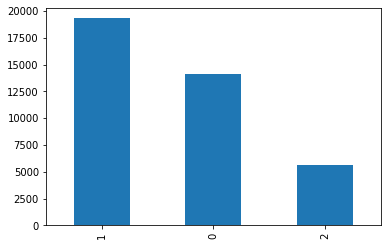

In [13]:
final_data['difficulty_label'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [14]:
val = pd.read_csv("val_skill_name_difficulty.csv")

In [15]:
val

,board_syllabus,question_answer,skill_label,difficulty_label
0,AP>>VII>>Science>>Animal Fibre>>Silk,Name the two types of protein from which silk...,3,0
1,Maharashtra New>>VIII>>General Science>>Man Ma...,Give reasons: (i) Thermocol is used for the p...,4,2
2,CBSE>>VI>>Science>>Fun with Magnets>>Demagneti...,Identify the odd option. Rubbing a magnetic m...,4,2
3,Tamil Nadu>>VIII>>Science>>Term 1>>Physics>>Li...,Find the speed of light in glass of refractiv...,1,0
4,Raj English>>XII>>Biology>>Integumentary Syste...,Which of the following function is associated...,2,0
...,...,...,...,...
2055,CBSE>>XI>>Chemistry>>Chemistry : Part I>>Equil...,The solubility of A 2 X 3 is y mol.dm -3 . So...,1,0
2056,CBSE>>VI>>Computer Science>>Using Mail Merge>>...,"To create an invitation letter, click on Mail...",1,1
2057,CBSE>>XII>>Physics>>Physics : Part - II>>Ray O...,Choose the correct option about the intensity...,0,0
2058,ICSE OLD>>VII>>Biology>>Organ System of Human ...,Which of the following instrument is used to ...,4,1


In [16]:
test = pd.read_csv("test_skill_name_difficulty.csv")
test

,board_syllabus,question_answer,skill_label,difficulty_label
0,CBSE>>Nursery>>Environmental Science>>Common V...,Write down the names of some common vegetable...,3,2
1,CBSE>>XII>>Physics>>Physics : Part - II>>Atoms,Name the series of hydrogen atom which lies i...,1,1
2,"ICSE OLD>>XI>>Political Science>>State, Govern...",Which of the following is not the element of ...,0,0
3,Maharashtra New>>VII>>General Science>>Static ...,The process of electrically charging an objec...,3,1
4,Tamil Nadu>>IX>>Science>>Physics>>Measurement>...,The mass of an object is measured in kilogram...,3,1
...,...,...,...,...
4572,ICSE OLD>>VIII>>Biology>>Nervous System And Se...,Which of the following is the first cranial n...,3,1
4573,CBSE>>VII>>Computer Science>>Advance features ...,To ungroup the worksheets: Right-click on any...,2,0
4574,CBSE>>VIII>>Science>>Chemical Effects of Elect...,After passing electricity through a solution ...,0,2
4575,CLSP>>Stage 9>>Science>>Chemistry>>Material pr...,Identify the scientists who gave the “plum-pu...,3,0


In [17]:
test["question_answer"].values

array([' Write down the names of some common vegetables. Answer may vary Probable answer – Names of some common vegetables are potato, onion, tomato and carrot. ',
       ' Name the series of hydrogen atom which lies in the U.V region. Lyman series lies in the U.V region. ',
       ' Which of the following is not the element of an association? Relationships are abstract Each association has elements 1) a group of people, 2) voluntary Membership, 3) shared and common interests or needs as the basis, 4) some set of objective goals which are to be achieved collectively by all the members, 5) a voluntary organisation, and 6) co-operation among the members objectives pooled resources for funds needed for action.',
       ...,
       ' After passing electricity through a solution the change that takes place is a chemical change Physical changes are those changes that do not result in the production of a new substance whereas a chemical change involves the production of a new substance. For e

In [18]:

import re

test["question_answer"] = test["question_answer"].apply(lambda x : clean_sentence(x))
test

,board_syllabus,question_answer,skill_label,difficulty_label
0,CBSE>>Nursery>>Environmental Science>>Common V...,Write down the names of some common vegetable...,3,2
1,CBSE>>XII>>Physics>>Physics : Part - II>>Atoms,Name the series of hydrogen atom which lies i...,1,1
2,"ICSE OLD>>XI>>Political Science>>State, Govern...",Which of the following is not the element of ...,0,0
3,Maharashtra New>>VII>>General Science>>Static ...,The process of electrically charging an objec...,3,1
4,Tamil Nadu>>IX>>Science>>Physics>>Measurement>...,The mass of an object is measured in kilogram...,3,1
...,...,...,...,...
4572,ICSE OLD>>VIII>>Biology>>Nervous System And Se...,Which of the following is the first cranial n...,3,1
4573,CBSE>>VII>>Computer Science>>Advance features ...,To ungroup the worksheets: Right-click on any...,2,0
4574,CBSE>>VIII>>Science>>Chemical Effects of Elect...,After passing electricity through a solution ...,0,2
4575,CLSP>>Stage 9>>Science>>Chemistry>>Material pr...,Identify the scientists who gave the “plum-pu...,3,0


In [19]:
test["question_answer"].values

array([' Write down the names of some common vegetables. Answer may vary Probable answer – Names of some common vegetables are potato, onion, tomato and carrot.',
       ' Name the series of hydrogen atom which lies in the U.V region. Lyman series lies in the U.V region.',
       ' Which of the following is not the element of an association? Relationships are abstract Each association has elements 1) a group of people, 2) voluntary Membership, 3) shared and common interests or needs as the basis, 4) some set of objective goals which are to be achieved collectively by all the members, 5) a voluntary organisation, and 6) co-operation among the members objectives pooled resources for funds needed for action.',
       ...,
       ' After passing electricity through a solution the change that takes place is a chemical change Physical changes are those changes that do not result in the production of a new substance whereas a chemical change involves the production of a new substance. For exa

In [20]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [21]:
def get_labels(prediction):
    predicted_label =  LE.inverse_transform([prediction])
    return predicted_label[0]

In [22]:
import joblib
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
LE = joblib.load('label_encoder_difficulty_Lstm')

get_labels(0)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.22.2.post1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


'Difficult'

In [23]:
final_data

,board_syllabus,question_answer,skill_label,difficulty_label
0,"Raj English>>XII>>Biology>>Domestication, Cult...","Among the following, freshwater fish is rohu ...",3,0
1,Maharashtra New>>VI>>General Science>>Sound>>P...,Which of the following statement is true? Sou...,3,2
2,ICSE OLD>>XI>>Computer Science>>Functions>>Con...,The process of using multiple constructors wi...,3,0
3,CBSE>>VI>>Science>>Separation of Substances>>S...,Sieving is based on the difference in the siz...,3,1
4,AP>>X>>Biology>>Excretion - The Wastage Dispos...,The removal of toxic and unwanted waste subst...,3,1
...,...,...,...,...
39124,CAPS(South Africa)>>Grade 7>>Natural Sciences>...,How heat loss problems are prevented by birds...,2,1
39125,CBSE>>X>>Science>>Metals and Non-Metal,Give reasons why copper is used to make hot w...,3,2
39126,CBSE>>VII>>Science>>Motion and Time,The horizontal line in the graph is denoted as...,2,1
39127,Tamil Nadu>>VI>>Science>>Term 1>>Physics>>Forc...,SI unit of force is newton The SI unit of for...,3,2


In [24]:
new_data = final_data

In [25]:
question_answer = new_data["question_answer"].values
categories = new_data["difficulty_label"].values
skill_category = new_data["skill_label"].values

In [26]:
question_answer

array([' Among the following, freshwater fish is rohu Rohu is a fresh water fish. Other common freshwater fish are catla, common carp.',
       ' Which of the following statement is true? Sound requires a medium for propagation. Sound travels through a medium (solid, liquid or gas). It cannot travel through vacuum.',
       ' The process of using multiple constructors with the same name but with different parameters is known as: Constructor overloading Constructor overloading is a technique in Java in which a class can have any number of constructors that differ in parameter lists.',
       ...,
       'The horizontal line in the graph is denoted as the X-axis. The horizontal line points in the horizontal direction and is denoted as the X-axis in the graph.',
       ' SI unit of force is newton The SI unit of force is Newton (N), named after famous scientist Isaac Newton who discovered force of gravitation.',
       ' In machines sliding frictions is replaced to rolling by use of ball 

In [27]:
question_answer[0]

' Among the following, freshwater fish is rohu Rohu is a fresh water fish. Other common freshwater fish are catla, common carp.'

In [28]:
len(categories)

39129

In [29]:
import torch
input_ids = []
attention_masks = []

for sent in question_answer:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])
# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)


# Print sentence 0, now as a list of IDs.
print('Original: ', question_answer[0])
print('Token IDs:', input_ids[0])

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:   Among the following, freshwater fish is rohu Rohu is a fresh water fish. Other common freshwater fish are catla, common carp.
Token IDs: tensor([  101,  2426,  1996,  2206,  1010, 12573,  3869,  2003, 20996,  6979,
        20996,  6979,  2003,  1037,  4840,  2300,  3869,  1012,  2060,  2691,
        12573,  3869,  2024,  4937,  2721,  1010,  2691, 29267,  1012,   102,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0, 

In [30]:
print('Original: ', len(question_answer[1]))
print('Token IDs:', len(input_ids[1]))

Original:  171
Token IDs: 128


In [31]:
val_text = val["question_answer"].values
val_labels = val["difficulty_label"].values
val_skill_labels = val["skill_label"].values
test_text = test["question_answer"].values
test_labels = test["difficulty_label"].values
test_skill_labels = test["skill_label"].values

In [32]:
test_labels

array([2, 1, 0, ..., 2, 0, 1])

In [33]:
val_labels

array([0, 2, 2, ..., 0, 1, 0])

In [34]:
val_input_ids = []
val_attention_masks = []

for sent in val_text:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    val_input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    val_attention_masks.append(encoded_dict['attention_mask'])
# Convert the lists into tensors.
val_input_ids = torch.cat(val_input_ids, dim=0)
val_attention_masks = torch.cat(val_attention_masks, dim=0)


# Print sentence 0, now as a list of IDs.
print('Original: ', val_text[0])
print('Token IDs:', val_attention_masks[0])

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:   Name the two types of protein from which silk is made. Sericin and fibroin 
Token IDs: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])


In [35]:
print('Original: ', val_text[1])
print('Token IDs:', val_input_ids[1])

Original:   Give reasons: (i) Thermocol is used for the packing of delicate items. (ii) Name two diseases that may develop in people working in thermocol industries. (i) Thermocol is a good shock-absorber, therefore, it is used for packing of delicate items. (ii) People working in thermocol industries may suffer from blood cancer such as leukemia and lymphoma or have problems in eyes and respiratory system. 
Token IDs: tensor([  101,  2507,  4436,  1024,  1006,  1045,  1007,  1996, 10867, 24163,
         2140,  2003,  2109,  2005,  1996, 14743,  1997, 10059,  5167,  1012,
         1006,  2462,  1007,  2171,  2048,  7870,  2008,  2089,  4503,  1999,
         2111,  2551,  1999,  1996, 10867, 24163,  2140,  6088,  1012,  1006,
         1045,  1007,  1996, 10867, 24163,  2140,  2003,  1037,  2204,  5213,
         1011, 16888,  2121,  1010,  3568,  1010,  2009,  2003,  2109,  2005,
        14743,  1997, 10059,  5167,  1012,  1006,  2462,  1007,  2111,  2551,
         1999,  1996, 10867, 24

In [36]:
labels = torch.tensor(categories)
skill_category = torch.tensor(skill_category)
val_labels = torch.tensor(val_labels)
val_skill_labels = torch.tensor(val_skill_labels)

In [37]:
val_labels

tensor([0, 2, 2,  ..., 0, 1, 0])

In [38]:
get_labels(1)

'Easy'

In [39]:
len(set(final_data["question_answer"].values).intersection(val["question_answer"].values))

0

In [40]:
num_classes = len(list(set(categories)))
list(set(categories))

[0, 1, 2]

In [41]:
skill_label_count = len(list(set(new_data["skill_label"].values)))
skill_label_count

5

In [42]:
list(set(new_data["skill_label"].values))

[0, 1, 2, 3, 4]

In [43]:
from torch.utils.data import TensorDataset, random_split
# train_poincare_tensor = torch.tensor(poincare_embeddings_final,dtype=torch.float)
# difficulty_tensor = torch.tensor(difficulty_level_vectors,dtype=torch.float)
# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels,skill_category)
val_dataset = TensorDataset(val_input_ids, val_attention_masks,val_labels,val_skill_labels) 
# Create a 90-10train-validation split.

# Calculate the number of samples to include in each set.
# train_size = int(0.90 * len(dataset))
# val_size = len(dataset) - train_size

# # Divide the dataset by randomly selecting samples.
# train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# print('{:>5,} training samples'.format(train_size))
# # print('{:>5,} validation samples'.format(val_size))

In [44]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
batch_size = 32
train_dataloader = DataLoader(
            dataset,  # The training samples.
            sampler = RandomSampler(dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), 
            batch_size = batch_size 
        )

In [45]:
from transformers import BertModel, AdamW, BertConfig

# # Loads BertForSequenceClassification, the pretrained BERT model with a single 
# model = BertModel.from_pretrained(
#     "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
# )

# # Tell pytorch to run this model on the GPU.
# model.cuda()

In [46]:
set(test["question_answer"].values).intersection(set(final_data["question_answer"].values))

set()

In [47]:
num_classes

3

In [48]:
from torch import nn
# for plottign attentions
class MultiClassClassifier(nn.Module):
    def __init__(self, bert_model_path, labels_count,skill_label_count, hidden_dim=768, mlp_dim=500, extras_dim=140, dropout=0.1, freeze_bert=False):
        super().__init__()

        self.bert = BertModel.from_pretrained(bert_model_path,output_hidden_states=True,output_attentions=True)
        self.dropout = nn.Dropout(dropout)
        self.mlp = nn.Sequential(
            nn.Linear(hidden_dim , mlp_dim),
            nn.ReLU(),
            # nn.Linear(mlp_dim, mlp_dim),
            # nn.ReLU(),
            # nn.Linear(mlp_dim, mlp_dim),
            # nn.ReLU(),            
            nn.Linear(mlp_dim, labels_count)
        )
        self.mlp2 = nn.Sequential(
            nn.Linear(hidden_dim , mlp_dim),
            nn.ReLU(),         
            nn.Linear(mlp_dim, skill_label_count)
        )
        # self.softmax = nn.LogSoftmax(dim=1)
        if freeze_bert:
            print("Freezing layers")
            for param in self.bert.parameters():
                param.requires_grad = False

    def forward(self, tokens, masks):
        _, pooled_output,hidden_states,attentions = self.bert(tokens, attention_mask=masks)
        dropout_output = self.dropout(pooled_output)
        concat_output = dropout_output
        mlp_output = self.mlp(concat_output)
        skill_output = self.mlp2(concat_output)
        # proba = self.sigmoid(mlp_output)
        # proba = self.softmax(mlp_output)

        return mlp_output,skill_output,attentions

In [49]:
from torch import nn


class Attention(nn.Module):
  def __init__(self,vector_1_dim,vector_2_dim):
    super(Attention, self).__init__()
    self.Weights = nn.Parameter(torch.rand(vector_2_dim,vector_1_dim))
    self.bias = nn.Parameter(torch.zeros(1))

  def forward(self,vector_1,vector_2):
    #(batch_size,vector_2_dim,vector_1_dim)
    weights = self.Weights.repeat(vector_2.size(0),1,1)
    vector_1 = vector_1.unsqueeze(-1)  # (batch_size,vector_2_dim,vector_1_dim)
    weights = weights.matmul(vector_1) # results in (batch_size,vector_2_dim,1)
    weights = weights.repeat(vector_2.size(1),1,1,1).transpose(0,1)
    vector_2 = vector_2.unsqueeze(-2)
    attention_weights = torch.tanh(vector_2.matmul(weights).squeeze() + self.bias) # batch_size, vector_2_dim.size(0)
    if len(attention_weights.shape) ==1:
      attention_weights = attention_weights.squeeze()
      attention_weights = attention_weights.reshape(1,-1)
    attention_weights = attention_weights.squeeze()
    # print("torch.exp(attention_weights)",torch.exp(attention_weights).shape,attention_weights.shape,torch.exp(attention_weights).sum(dim=1).shape)
    attention_weights = torch.exp(attention_weights)/ torch.exp(attention_weights).sum(dim=1,keepdim=True)

    return attention_weights

# bloom interactive attention
class MultiClassClassifier(nn.Module):
    def __init__(self, bert_model_path, labels_count,skill_label_count, hidden_dim=768, mlp_dim=500, extras_dim=140, dropout=0.1, freeze_bert=False):
        super().__init__()

        self.bert = BertModel.from_pretrained(bert_model_path,output_hidden_states=True,output_attentions=True)
        self.dropout = nn.Dropout(dropout)
        self.bloom_attention = Attention(768, 768)

        self.mlp = nn.Sequential(
            nn.Linear(hidden_dim , mlp_dim),
            nn.ReLU(),
            # nn.Linear(mlp_dim, mlp_dim),
            # nn.ReLU(),
            # nn.Linear(mlp_dim, mlp_dim),
            # nn.ReLU(),            
            nn.Linear(mlp_dim, labels_count)
        )
        self.mlp2 = nn.Sequential(  
            nn.Linear(hidden_dim , mlp_dim),
            nn.ReLU(),         
            nn.Linear(mlp_dim, skill_label_count)
        )
        # self.softmax = nn.LogSoftmax(dim=1)
        if freeze_bert:
            print("Freezing layers")
            for param in self.bert.parameters():
                param.requires_grad = False

    def forward(self, tokens, masks):
        _, pooled_output,hidden_states,attentions = self.bert(tokens, attention_mask=masks)
        dropout_output = self.dropout(pooled_output)
        concat_output = dropout_output

        # mlp_output = self.mlp(concat_output)
        skill_output_probas = self.mlp2(concat_output)
        skill_output = torch.argmax(skill_output_probas,axis=1).cpu().numpy()
        skill_output = LE_skill.inverse_transform(skill_output)
        skill_input_ids = []
        skill_attention_masks = []
        for skill_text in skill_output:
          encoded_skill_output = tokenizer.encode_plus(
                          skill_text,                      # Sentence to encode.
                          add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                          max_length = 128,           # Pad & truncate all sentences.
                          pad_to_max_length = True,
                          truncation=True,
                          return_attention_mask = True,   # Construct attn. masks.
                          return_tensors = 'pt',     # Return pytorch tensors.
                    )
          skill_input_ids.append(encoded_skill_output['input_ids'])
          skill_attention_masks.append(encoded_skill_output['attention_mask'])
        skill_input_ids = torch.cat(skill_input_ids,dim=0).cuda()
        skill_attention_masks = torch.cat(skill_attention_masks,dim=0).cuda()
        _,_,hidden_states_skill,_ = self.bert(skill_input_ids,skill_attention_masks)

        skill_hidden_averaged =  torch.sum(hidden_states_skill[12],dim=1)/hidden_states_skill[12].shape[1]

        bloom_attention_weights = self.bloom_attention(skill_hidden_averaged, hidden_states[12])

        bloom_attention_weights = bloom_attention_weights.unsqueeze(-2)
        # print("context_attention_weights",context_attention_weights.shape,context_out.shape)
        input_attended_vector = bloom_attention_weights.matmul(hidden_states[12]).squeeze()

        mlp_output = self.mlp(input_attended_vector)

        # print("bloom attention weights", bloom_attention_weights.shape)
        # print("_hidden_states",hidden_states_skill[12].shape, hidden_states[12].shape,skill_hidden_averaged.shape)

        # proba = self.sigmoid(mlp_output)
        # proba = self.softmax(mlp_output)

        return mlp_output,skill_output_probas

In [50]:
model = MultiClassClassifier('bert-base-uncased',num_classes, skill_label_count,768,500,140,dropout=0.1,freeze_bert=False)
model.load_state_dict(torch.load("model_bert_multi_task_interactive_final/model_weights"))
model.cuda()

Downloading:   0%|          | 0.00/433 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

MultiClassClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affi

In [51]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [52]:
from transformers import get_linear_schedule_with_warmup


epochs = 20

# Total number of training steps is [number of batches] x [number of epochs]. 
total_steps = len(train_dataloader) * epochs



In [53]:
len(train_dataloader) 

1223

In [54]:
1935 * 32

61920

In [55]:
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [56]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [57]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [58]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"


In [59]:
# model.to(device)
model

MultiClassClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affi

In [ ]:
for param in model.bert.encoder.layer[0:5].parameters():
    param.requires_grad=False
for param in model.bert.embeddings.parameters():
    param.requires_grad=False


In [ ]:
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print            
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [ ]:
loss_func = nn.CrossEntropyLoss()


In [ ]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()
early_stopping = EarlyStopping(patience=2, verbose=True)
# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_accuracy = 0
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questimport gensim.downloader as api
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels
         
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        # b_poincare = batch[2].to(device)
        # b_difficulty = batch[3].to(device)
        b_labels = batch[2].to(device)
        skill_labels = batch[3].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        probas, skill_probs = model(b_input_ids,b_input_mask)

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        loss_1 = loss_func(probas, b_labels)
        skill_loss = loss_func(skill_probs,skill_labels)
        loss = loss_1 + skill_loss
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        # torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        # scheduler.step()
        logits = probas.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        total_train_accuracy += flat_accuracy(logits, label_ids)
    avg_train_accuracy = total_train_accuracy / len(train_dataloader)
    print(" Train Accuracy: {0:.2f}".format(avg_train_accuracy))

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader) 

            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        # b_poincare = batch[2].to(device)
        # b_difficulty = batch[3].to(device)
        b_labels = batch[2].to(device)
        skill_labels = batch[3].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.

          logits, skill_logits = model(b_input_ids,b_input_mask)
            
        # Accumulate the validation loss.
        loss_1 = loss_func(logits, b_labels)
        skill_loss = loss_func(skill_logits,skill_labels)
        loss = loss_1 + skill_loss
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    early_stopping(avg_val_loss, model)
    if early_stopping.early_stop:
      print("Early stopping")
      break    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))
    output_dir = 'model_bert_multi_task_interactive_final/'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    if early_stopping.counter == 0:
      print("Saving model to %s" % output_dir)
      tokenizer.save_pretrained(output_dir)
      torch.save(model.state_dict(), os.path.join(output_dir, 'model_weights'))

      !rm -rf "/content/drive/My Drive/research_skill_name_prediction/model_bert_multi_task_interactive_final"
      !mv model_bert_multi_task_interactive_final "/content/drive/My Drive/research_skill_name_prediction/"
    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 20 ========
Training...


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


  Batch    40  of  1,223.    Elapsed: 0:01:10.
  Batch    80  of  1,223.    Elapsed: 0:02:19.
  Batch   120  of  1,223.    Elapsed: 0:03:29.
  Batch   160  of  1,223.    Elapsed: 0:04:39.
  Batch   200  of  1,223.    Elapsed: 0:05:48.
  Batch   240  of  1,223.    Elapsed: 0:06:58.
  Batch   280  of  1,223.    Elapsed: 0:08:08.
  Batch   320  of  1,223.    Elapsed: 0:09:17.
  Batch   360  of  1,223.    Elapsed: 0:10:27.
  Batch   400  of  1,223.    Elapsed: 0:11:37.
  Batch   440  of  1,223.    Elapsed: 0:12:46.
  Batch   480  of  1,223.    Elapsed: 0:13:56.
  Batch   520  of  1,223.    Elapsed: 0:15:05.
  Batch   560  of  1,223.    Elapsed: 0:16:15.
  Batch   600  of  1,223.    Elapsed: 0:17:25.
  Batch   640  of  1,223.    Elapsed: 0:18:34.
  Batch   680  of  1,223.    Elapsed: 0:19:44.
  Batch   720  of  1,223.    Elapsed: 0:20:54.
  Batch   760  of  1,223.    Elapsed: 0:22:05.
  Batch   800  of  1,223.    Elapsed: 0:23:16.
  Batch   840  of  1,223.    Elapsed: 0:24:25.
  Batch   880

In [ ]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,2.25,2.16,0.55,0:35:32,0:00:59
2,2.09,2.12,0.55,0:36:03,0:00:59
3,1.97,2.12,0.55,0:35:59,0:00:59
4,1.83,2.21,0.56,0:36:00,0:00:58


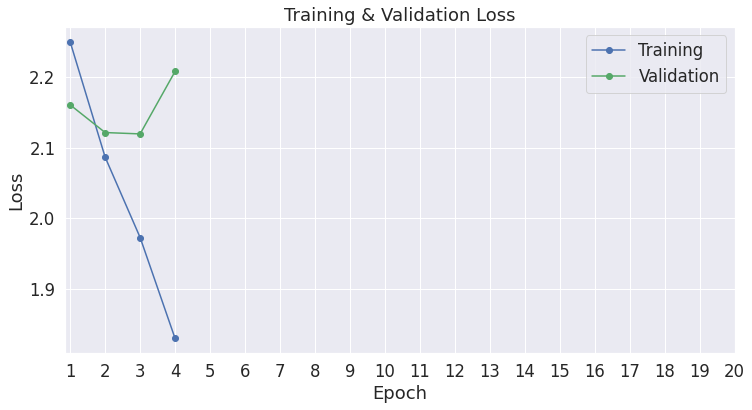

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

plt.show()

In [ ]:
import os


output_dir = 'model_bert_multi_task_interactive_final/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)


# model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
# model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

Saving model to model_bert_multi_task_interactive/


('model_bert_multi_task_interactive/vocab.txt',
 'model_bert_multi_task_interactive/special_tokens_map.json',
 'model_bert_multi_task_interactive/added_tokens.json')

In [ ]:
  import json
  torch.save(model.state_dict(), os.path.join(output_dir, 'model_weights'))
  # with open(os.path.join(output_dir, 'model_config.json'), 'w') as f:
  #     json.dump(model.config, f)

In [ ]:
# !pip install joblib
# import joblib
# joblib.dump(LE, "label_encoder_BLOOM_LATEST")


In [ ]:
from google.colab import files


In [ ]:
!zip -r model_bert_multi_task_interactive.zip model_bert_multi_task_interactive
# files.download('model_bert_difficulty_prediction.zip')

  adding: model_bert_multi_task_interactive/ (stored 0%)
  adding: model_bert_multi_task_interactive/model_weights (deflated 7%)
  adding: model_bert_multi_task_interactive/special_tokens_map.json (deflated 40%)
  adding: model_bert_multi_task_interactive/vocab.txt (deflated 53%)
  adding: model_bert_multi_task_interactive/tokenizer_config.json (stored 0%)


In [ ]:
# !zip -r label_encoder_BLOOM_LATEST.zip label_encoder_BLOOM_LATEST
# files.download('label_encoder_BLOOM_LATEST.zip')

In [60]:
test

,board_syllabus,question_answer,skill_label,difficulty_label
0,CBSE>>Nursery>>Environmental Science>>Common V...,Write down the names of some common vegetable...,3,2
1,CBSE>>XII>>Physics>>Physics : Part - II>>Atoms,Name the series of hydrogen atom which lies i...,1,1
2,"ICSE OLD>>XI>>Political Science>>State, Govern...",Which of the following is not the element of ...,0,0
3,Maharashtra New>>VII>>General Science>>Static ...,The process of electrically charging an objec...,3,1
4,Tamil Nadu>>IX>>Science>>Physics>>Measurement>...,The mass of an object is measured in kilogram...,3,1
...,...,...,...,...
4572,ICSE OLD>>VIII>>Biology>>Nervous System And Se...,Which of the following is the first cranial n...,3,1
4573,CBSE>>VII>>Computer Science>>Advance features ...,To ungroup the worksheets: Right-click on any...,2,0
4574,CBSE>>VIII>>Science>>Chemical Effects of Elect...,After passing electricity through a solution ...,0,2
4575,CLSP>>Stage 9>>Science>>Chemistry>>Material pr...,Identify the scientists who gave the “plum-pu...,3,0


In [61]:
test_features = test["question_answer"].values
test_labels = test["difficulty_label"].values
test_skill_labels = test["skill_label"].values

In [62]:
test_labels

array([2, 1, 0, ..., 2, 0, 1])

In [63]:
test_features

array([' Write down the names of some common vegetables. Answer may vary Probable answer – Names of some common vegetables are potato, onion, tomato and carrot.',
       ' Name the series of hydrogen atom which lies in the U.V region. Lyman series lies in the U.V region.',
       ' Which of the following is not the element of an association? Relationships are abstract Each association has elements 1) a group of people, 2) voluntary Membership, 3) shared and common interests or needs as the basis, 4) some set of objective goals which are to be achieved collectively by all the members, 5) a voluntary organisation, and 6) co-operation among the members objectives pooled resources for funds needed for action.',
       ...,
       ' After passing electricity through a solution the change that takes place is a chemical change Physical changes are those changes that do not result in the production of a new substance whereas a chemical change involves the production of a new substance. For exa

In [64]:
test_features[0]

' Write down the names of some common vegetables. Answer may vary Probable answer – Names of some common vegetables are potato, onion, tomato and carrot.'

In [65]:
test_features[0]

' Write down the names of some common vegetables. Answer may vary Probable answer – Names of some common vegetables are potato, onion, tomato and carrot.'

In [66]:
# syllabus = get_syllabus(test_features.values)
# poincare_emb_test = get_poincare_embeddings(syllabus)
# # for i,oincare in enumerate(poincare_emb_test):
# #   for x in oincare:
# #     print(i)
# #     print(oincare)
# #     print(poincare_model.kv.get_vector(str(x)))

# poincare_embedding_test =  [exponential_map(np.expand_dims( np.hstack(  [ poincare_model.kv.get_vector(str(x)) for x in taxonomy ] ),axis=0)) for taxonomy in poincare_emb_test ]
# max_val = 0
# max_emb =None
# for embedding in poincare_embedding_test:
#   val = embedding.shape[1]
#   if val >max_val:
#     max_val=val
#     max_emb =embedding
# max_val
# concatenated_embedding = []
# for embedding in poincare_embedding_test:
#   if embedding.shape[1] < max_val:
#     new_embedding = np.append(embedding, np.expand_dims(np.zeros(max_val-embedding.shape[1]),axis=0),axis=1)
#   else:
#     new_embedding = embedding
#   concatenated_embedding.append(np.squeeze(new_embedding,axis=0))
# poincare_embeddings_final = np.stack(concatenated_embedding, axis=0)
# for feature_set in test_features:
#   if feature_set[1]!=feature_set[1]: #to check for nan
#     print("here")
#     feature_set[1] = "unk"
#   else:
#     feature_set[1]=feature_set[1].lower()
# difficulty_level_vectors=[]
# for feature_set in test_features:
#   words = [word for word in feature_set[1].split(" ")]
#   if len(words) > 1:
#     print("here")
#     difficulty_level_vectors.append(np.mean(wv[words],axis=0))
#   else:
#     difficulty_level_vectors.append(wv[words].squeeze(axis=0))
# difficulty_level_vectors = np.array(difficulty_level_vectors)

In [67]:
input_ids = []
attention_masks = []
for sent in test_features:

    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
test_labels = torch.tensor(test_labels)
test_skill_labels = torch.tensor(test_skill_labels)

# Set the batch size.  
batch_size = 34
# test_poincare_tensor = torch.tensor(poincare_embeddings_final,dtype=torch.float)
# print(test_poincare_tensor.shape)
# difficulty_tensor = torch.tensor(difficulty_level_vectors,dtype=torch.float)
# print("difficulty_tensor",difficulty_tensor.shape)
# Combine the training inputs into a TensorDataset.
prediction_data = TensorDataset(input_ids, attention_masks, test_labels,test_skill_labels)
# Create the DataLoader.
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [68]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions,skill_predictions , true_labels, true_skill_labels = [], [], [], []

# Predict ea
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels,skill_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  # print("b_input_ids",b_input_ids.shape)
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs,skill_ouputs = model(b_input_ids,b_input_mask)

  logits = outputs
  skill_logits = skill_ouputs

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  skill_logits = skill_logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  skill_labels = skill_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  skill_predictions.append(skill_logits)
  true_labels.append(label_ids)
  true_skill_labels.append(skill_labels)


print('    DONE.')

Predicting labels for 4,577 test sentences...


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


    DONE.


print('Positive samples: %d of %d (%.2f%%)' % (final_data.label.sum(), len(final_data.label), (final_data.label.sum() / len(final_data.label) * 100.0)))

In [69]:
true_skill_labels[0]

array([3, 1, 0, 3, 3, 1, 2, 3, 4, 1, 4, 2, 4, 3, 3, 3, 2, 4, 1, 4, 3, 2,
       3, 4, 3, 4, 2, 2, 4, 3, 1, 3, 3, 4])

In [70]:
import numpy as np
pred =  np.argmax(predictions[0],axis=1).flatten()
pred

array([2, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1])

In [71]:
from sklearn.metrics import matthews_corrcoef

matthews_set = []

# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
for i in range(len(true_labels)):
  
  # The predictions for this batch are a 2-column ndarray (one column for "0" 
  # and one column for "1"). Pick the label with the highest value and turn this
  # in to a list of 0s and 1s.
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  
  # Calculate and store the coef for this batch.  
  matthews = matthews_corrcoef(true_labels[i], pred_labels_i)                
  matthews_set.append(matthews)

Calculating Matthews Corr. Coef. for each batch...


In [72]:
import numpy as np
flat_predictions = np.concatenate(predictions, axis=0)

flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('Total MCC: %.3f' % mcc)

Total MCC: 0.241


In [73]:
flat_skill_predictions = np.concatenate(skill_predictions, axis=0)

flat_skill_predictions = np.argmax(flat_skill_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_skill_labels = np.concatenate(true_skill_labels, axis=0)

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_skill_labels, flat_skill_predictions)

print('Total MCC: %.3f' % mcc)

Total MCC: 0.344


In [ ]:
len(flat_true_skill_labels)

4577

In [ ]:
(set(test_features).intersection(set(question_answer)))

set()

In [ ]:
question_answer[30]

' Match Column I with Column II and select the correct match from the following options.  Column I  Column II a Food allergy i Pollen grains b Dust allergy ii Aspirin c Seasonal allergy iii Avocado d Drug allergy iv Asthma a-iii, b-iv, c-i, d-ii Food allergy refers to an abnormal response to a food triggered by the body&#39;s immune system.    Dust allergy is a perennial allergy.    Seasonal allergy occur during a particular period due to pollen grains, smog etc.    A drug allergy refers to the abnormal reaction of the immune system to a medication.'

In [ ]:
test_features

array([' Write down the names of some common vegetables. Answer may vary Probable answer – Names of some common vegetables are potato, onion, tomato and carrot.',
       ' Name the series of hydrogen atom which lies in the U.V region. Lyman series lies in the U.V region.',
       ' Which of the following is not the element of an association? Relationships are abstract Each association has elements 1) a group of people, 2) voluntary Membership, 3) shared and common interests or needs as the basis, 4) some set of objective goals which are to be achieved collectively by all the members, 5) a voluntary organisation, and 6) co-operation among the members objectives pooled resources for funds needed for action.',
       ...,
       ' After passing electricity through a solution the change that takes place is a chemical change Physical changes are those changes that do not result in the production of a new substance whereas a chemical change involves the production of a new substance. For exa

In [74]:
def accuracy_per_class(preds_flat, labels_flat):

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {get_labels(label)}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [ ]:
accuracy_per_class(flat_predictions,flat_true_labels)

Class: Difficult
Accuracy: 704/1646

Class: Easy
Accuracy: 1812/2207

Class: Medium
Accuracy: 66/724



In [75]:
accuracy_per_class(flat_predictions,flat_true_labels)

Class: Difficult
Accuracy: 704/1646

Class: Easy
Accuracy: 1812/2207

Class: Medium
Accuracy: 66/724



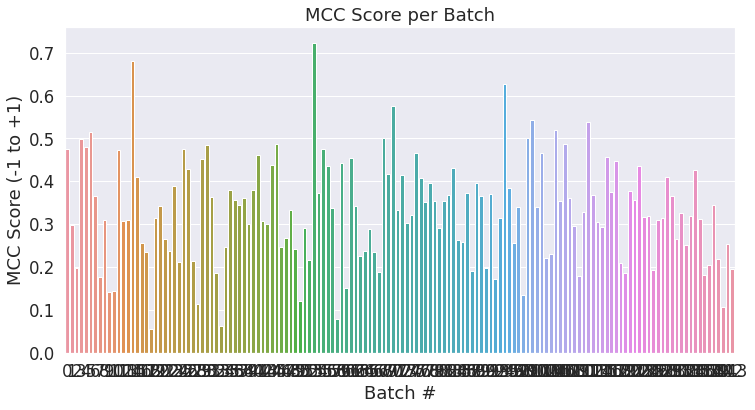

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.barplot(x=list(range(len(matthews_set))), y=matthews_set, ci=None)

plt.title('MCC Score per Batch')
plt.ylabel('MCC Score (-1 to +1)')
plt.xlabel('Batch #')

plt.show()

In [76]:
flat_predictions = np.concatenate(predictions, axis=0)

flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('Total MCC: %.3f' % mcc)

Total MCC: 0.241


In [77]:
flat_skill_predictions

array([4, 3, 4, ..., 4, 3, 2])

In [78]:
list_bool = (flat_true_labels==flat_predictions)
print(list_bool)
print(len([i for i, val in enumerate(list_bool) if val]))
len(flat_predictions)

[ True  True  True ... False False  True]
2582


4577

In [79]:
print('Total MCC: %.3f' % mcc)


Total MCC: 0.241


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
#difficulty
print(precision_recall_fscore_support(flat_true_labels, flat_predictions, average='micro'))

(0.5641249726895347, 0.5641249726895347, 0.5641249726895347, None)


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
#difficulty
print(precision_recall_fscore_support(flat_true_labels, flat_predictions, average='macro'))

(0.5442240407604801, 0.44662925306253287, 0.43738428335682006, None)


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
#difficulty
print(precision_recall_fscore_support(flat_true_labels, flat_predictions, average='weighted'))

(0.5562658106941797, 0.5641249726895347, 0.5227785925103615, None)


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
#skill_name
print(precision_recall_fscore_support(flat_true_skill_labels, flat_skill_predictions, average='micro'))

(0.497268953462967, 0.497268953462967, 0.497268953462967, None)


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
#skill name
print(precision_recall_fscore_support(flat_true_skill_labels, flat_skill_predictions, average='macro'))

(0.47295264864206227, 0.4525809955456225, 0.4566786206047767, None)


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
#skill name
print(precision_recall_fscore_support(flat_true_skill_labels, flat_skill_predictions, average='weighted'))

(0.49017371474241145, 0.497268953462967, 0.4890541125968272, None)


In [80]:
def get_confusion_matrix(predicted,actual):
    conf_matrix = np.zeros((5, 5))
    for pred,act in zip(predicted,actual):
        conf_matrix[act,pred]+=1
    return conf_matrix
        
def get_TP(confusion_matrix,label):
    tp = confusion_matrix[label][label]
    return tp

def get_FN(confusion_matrix,label):
    row = confusion_matrix[label,]
    row_truepositives = row[label]
    fn = row.sum() - row_truepositives
    return fn

def get_FP(confusion_matrix,tag):
    col = confusion_matrix[:,tag]
    col_tp = col[tag]
    #  sum of all values in column except tp
    fp = col.sum() - col_tp
    return fp
def Precision(conf_matrix):
    precision = 0.0
    for label in [0,1,2,3,4]:
        dividor= get_TP(conf_matrix,label)+get_FP(conf_matrix,label)
        if dividor != 0.0:
            precision += (get_TP(conf_matrix,label))/dividor
    return (precision / 5)

def Recall(conf_matrix):
    recall = 0.0
    for label in [0,1,2,3,4]:
        dividor=get_TP(conf_matrix,label)+get_FN(conf_matrix,label)
        if dividor != 0.0:
            recall += (get_TP(conf_matrix,label))/dividor
    return (recall / 5)

def F1(precision,recall):
    return (2*precision*recall)/(precision+recall)
def accuracy_per_class(preds_flat, labels_flat):

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')
def print_metrics(predictions,test_labels):
    conf_matrix = get_confusion_matrix(predictions,test_labels)
    precision = Precision(conf_matrix)
    recall = Recall(conf_matrix)
    f1_score = F1(precision,recall)
    print("Macro : Precision:{}, Recall: {}, F1: {}".format(precision,recall,f1_score))

In [81]:
def Precision_macro_weighted(conf_matrix,test_samples):
    accum =0
    label_wise_precision = dict()
    for label in [0,1,2,3,4]:
        true_sample = [sample for sample in test_samples if sample==label ]
        if (get_TP(conf_matrix,label)+get_FP(conf_matrix,label))!=0:
            accum+= float(len(true_sample)) *(get_TP(conf_matrix,label)/(get_TP(conf_matrix,label)+get_FP(conf_matrix,label)))
            label_wise_precision[label] = get_TP(conf_matrix,label)/(get_TP(conf_matrix,label)+get_FP(conf_matrix,label))

    
    precision =  accum/len(test_samples)
            
    return precision


def Recall_macro_weighted(conf_matrix,test_samples):
    accum =0
    label_wise_recall = dict()
    for label in [0,1,2,3,4]:
        true_sample = [sample for sample in test_samples if sample==label ]

        if (get_TP(conf_matrix,label)+get_FN(conf_matrix,label))!=0:
            accum+= float(len(true_sample)) * (get_TP(conf_matrix,label)/(get_TP(conf_matrix,label)+get_FN(conf_matrix,label)))
            label_wise_recall[label] = get_TP(conf_matrix,label)/(get_TP(conf_matrix,label)+get_FN(conf_matrix,label))

    
    recall =  accum/len(test_samples)
    return recall
def print_weighted_metrics(predictions,test_labels):
    conf_matrix = get_confusion_matrix(predictions,test_labels)
    precision = Precision_macro_weighted(conf_matrix,test_labels)
    recall = Recall_macro_weighted(conf_matrix,test_labels)
    f1_score = F1(precision,recall)
    print("Macro : Precision:{}, Recall: {}, F1: {}".format(precision,recall,f1_score))

In [ ]:
def get_confusion_matrix(predicted,actual):
    conf_matrix = np.zeros((3, 3))
    for pred,act in zip(predicted,actual):
        conf_matrix[act,pred]+=1
    return conf_matrix
        
def get_TP(confusion_matrix,label):
    tp = confusion_matrix[label][label]
    return tp

def get_FN(confusion_matrix,label):
    row = confusion_matrix[label,]
    row_truepositives = row[label]
    fn = row.sum() - row_truepositives
    return fn

def get_FP(confusion_matrix,tag):
    col = confusion_matrix[:,tag]
    col_tp = col[tag]
    #  sum of all values in column except tp
    fp = col.sum() - col_tp
    return fp
def Precision(conf_matrix):
    precision = 0.0
    for label in [0,1,2]:
        dividor= get_TP(conf_matrix,label)+get_FP(conf_matrix,label)
        if dividor != 0.0:
            precision += (get_TP(conf_matrix,label))/dividor
    return (precision / 3)

def Recall(conf_matrix):
    recall = 0.0
    for label in [0,1,2]:
        dividor=get_TP(conf_matrix,label)+get_FN(conf_matrix,label)
        if dividor != 0.0:
            recall += (get_TP(conf_matrix,label))/dividor
    return (recall / 3)

def F1(precision,recall):
    return (2*precision*recall)/(precision+recall)
def accuracy_per_class(preds_flat, labels_flat):

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')
def print_metrics(predictions,test_labels):
    conf_matrix = get_confusion_matrix(predictions,test_labels)
    precision = Precision(conf_matrix)
    recall = Recall(conf_matrix)
    f1_score = F1(precision,recall)
    print("Macro : Precision:{}, Recall: {}, F1: {}".format(precision,recall,f1_score))

In [ ]:
def Precision_macro_weighted(conf_matrix,test_samples):
    accum =0
    label_wise_precision = dict()
    for label in [0,1,2]:
        true_sample = [sample for sample in test_samples if sample==label ]
        if (get_TP(conf_matrix,label)+get_FP(conf_matrix,label))!=0:
            accum+= float(len(true_sample)) *(get_TP(conf_matrix,label)/(get_TP(conf_matrix,label)+get_FP(conf_matrix,label)))
            label_wise_precision[label] = get_TP(conf_matrix,label)/(get_TP(conf_matrix,label)+get_FP(conf_matrix,label))

    
    precision =  accum/len(test_samples)
            
    return precision


def Recall_macro_weighted(conf_matrix,test_samples):
    accum =0
    label_wise_recall = dict()
    for label in [0,1,2]:
        true_sample = [sample for sample in test_samples if sample==label ]

        if (get_TP(conf_matrix,label)+get_FN(conf_matrix,label))!=0:
            accum+= float(len(true_sample)) * (get_TP(conf_matrix,label)/(get_TP(conf_matrix,label)+get_FN(conf_matrix,label)))
            label_wise_recall[label] = get_TP(conf_matrix,label)/(get_TP(conf_matrix,label)+get_FN(conf_matrix,label))

    
    recall =  accum/len(test_samples)
    return recall
def print_weighted_metrics(predictions,test_labels):
    conf_matrix = get_confusion_matrix(predictions,test_labels)
    precision = Precision_macro_weighted(conf_matrix,test_labels)
    recall = Recall_macro_weighted(conf_matrix,test_labels)
    f1_score = F1(precision,recall)
    print("Macro : Precision:{}, Recall: {}, F1: {}".format(precision,recall,f1_score))

In [ ]:
#difficuty macro
print_metrics(flat_predictions,flat_true_labels)

Macro : Precision:0.5442240407604801, Recall: 0.44662925306253287, F1: 0.4906203134990908


In [ ]:
#difficulty
print_weighted_metrics(flat_predictions,flat_true_labels)

Macro : Precision:0.5562658106941797, Recall: 0.5641249726895347, F1: 0.5601678270116647


In [ ]:
#skill name
print_metrics(flat_skill_predictions,flat_true_skill_labels)

Macro : Precision:0.49691390428987053, Recall: 0.4473318465516504, F1: 0.470821106020493


In [82]:
#skill name
print_metrics(flat_skill_predictions,flat_true_skill_labels)

Macro : Precision:0.49691390428987053, Recall: 0.4473318465516504, F1: 0.470821106020493


In [ ]:
#skill name
print_weighted_metrics(flat_skill_predictions,flat_true_skill_labels)

Macro : Precision:0.5021446160334097, Recall: 0.5064452698273979, F1: 0.5042857738799726


In [84]:
#skill name
print_weighted_metrics(flat_skill_predictions,flat_true_skill_labels)

Macro : Precision:0.5021446160334097, Recall: 0.5064452698273979, F1: 0.5042857738799726


In [ ]:
def accuracy_per_class(preds_flat, labels_flat):

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {get_labels(label)}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [ ]:
accuracy_per_class(flat_predictions,flat_true_labels)

Class: Difficult
Accuracy: 704/1646

Class: Easy
Accuracy: 1812/2207

Class: Medium
Accuracy: 66/724



In [ ]:
accuracy_per_class(flat_skill_predictions,flat_true_skill_labels)

In [ ]:
!cp -r /content/model_bert_multi_task_interactive.zip "/content/drive/My Drive/research_skill_name_prediction/" 

In [ ]:
!cp -r "/content/drive/My Drive/research_skill_name_prediction/model_bert_multi_task_prediction.zip" /content/

In [ ]:
!unzip model_bert_multi_task_prediction.zip

Archive:  model_bert_multi_task_prediction.zip
   creating: model_bert_multi_task_prediction/
  inflating: model_bert_multi_task_prediction/model_weights  
  inflating: model_bert_multi_task_prediction/tokenizer_config.json  
  inflating: model_bert_multi_task_prediction/special_tokens_map.json  
  inflating: model_bert_multi_task_prediction/vocab.txt  


In [ ]:
!cp -r /content/model_bert_multi_task_interactive "/content/drive/My Drive/research_skill_name_prediction/" 